In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import healpy as hp
from cosmikyu import maps, config, utils
from cosmikyu import transforms as cmk_transforms
from torchvision import transforms
from soapack import interfaces as soint
import healpy as hp
import numpy as np
import os
from orphics import maps as omaps
from pixell import enplot, enmap
from sandbox import misc as sbmisc
from sandbox import stats as sbstats

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_style("whitegrid")

In [2]:
output_dir = config.default_data_dir
def output_path(x):
    return os.path.join(output_dir, x)

os.makedirs(output_path("fg_reference"), exist_ok=True)

def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [3]:
sehgal_sim_path = soint.dconfig['actsims']['sehgal09_path']
SH = maps.SehgalSky2010(sehgal_sim_path, data_type='alm')
fg_idxes = ['ir_pts']#, 'ksz', 'rad_pts', 'tsz']
freq_idxes = ['148']
rot_angs = [0, 20, 40, 60, 80, 100, 120, 140, 160]
lmax = 7000
#fg_idxes = ['rad_pts']
bin_edges = sbmisc.read_bin_edges('/home/dhan1/popeye/cosmikyu/resources/BIN_ACTPOL_50_4_SC_low_ell_startAt2')
bin_edges = bin_edges[bin_edges < lmax]

binner = sbstats.BINNER(bin_edges, lmax=lmax)


In [4]:
def cl2dl(cl):
    l = np.arange(len(cl))
    dl = cl*(l*(l+1))/(2*np.pi)
    return (l, dl)


In [5]:
specs = utils.create_dict(fg_idxes, freq_idxes, rot_angs)
for fg_idx in fg_idxes:
    for freq_idx in freq_idxes:
        for rot_ang in rot_angs:
            alm = SH.fg_loaders[fg_idx](freq_idx, euler=(0, rot_ang, 0))
            l, specs[fg_idx][freq_idx][rot_ang] = cl2dl(hp.alm2cl(alm))
            
            if rot_ang == 0:
                temp = np.zeros((len(specs[fg_idx][freq_idx][rot_ang]), 2))
                temp[:,0] = l
                temp[:,1] = specs[fg_idx][freq_idx][rot_ang]
                spec_file = output_path("fg_reference/{}_{}_dls.txt".format(freq_idx, fg_idx))
                print(spec_file)
                np.save(spec_file, temp)
                del temp
            
            del alm
                        

/home/dhan1/popeye/cosmikyu/cosmikyu/../data/fg_reference/148_ir_pts_dls.txt


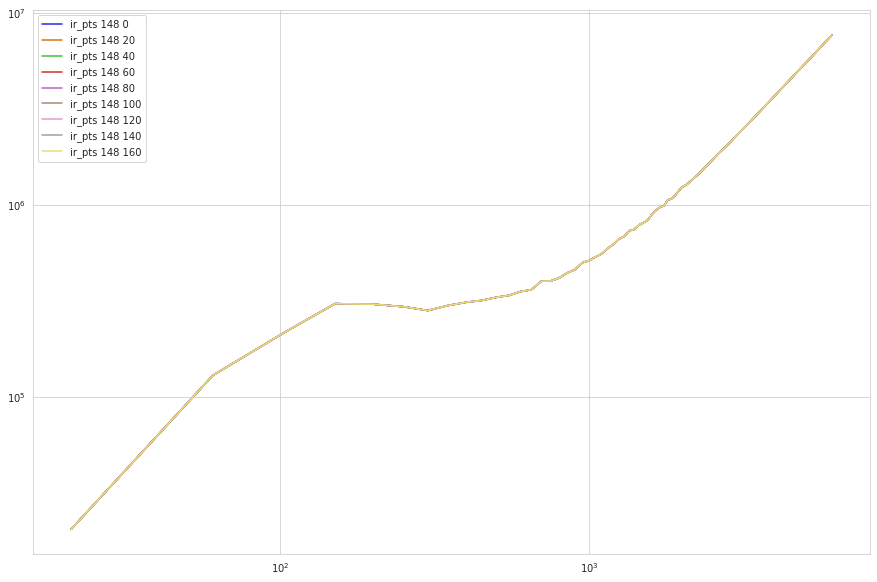

In [6]:
fig = plt.figure(figsize=(15,10))
for fg_idx in fg_idxes:
    for freq_idx in freq_idxes:
        for rot_ang in rot_angs:
            dl = specs[fg_idx][freq_idx][rot_ang]
            lbin, dlbin = binner.bin(l, dl)
            plt.plot(lbin, dlbin, label="{} {} {}".format(fg_idx, freq_idx, rot_ang))
plt.yscale("log")
plt.xscale("log")
plt.legend(fontsize=10)
plt.show()

/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount

/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount

/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count
/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count


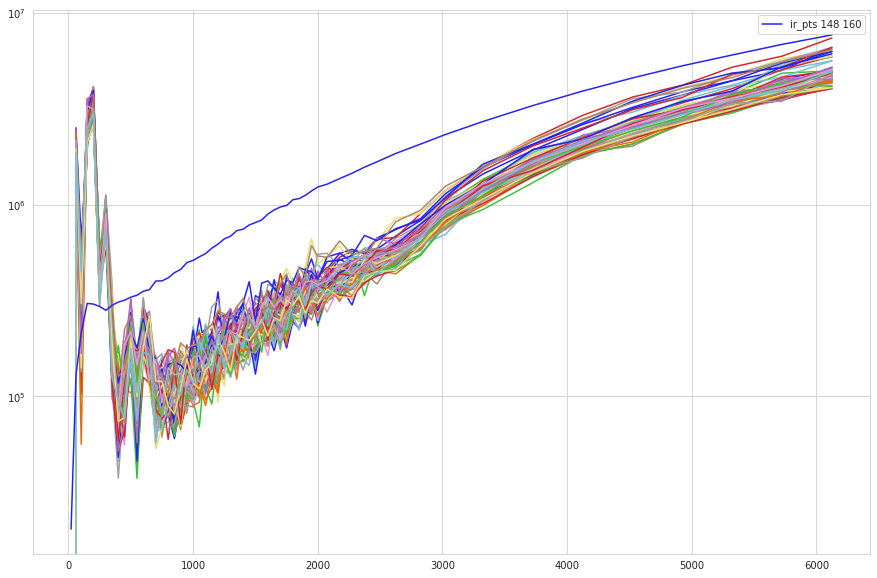

In [7]:
res_arcmin = 2.0
shape = (150, 150)
stamp_dir = output_path("stamp_{}arcmin_{}x{}".format(res_arcmin, shape[0], shape[1]))

#meta = np.loadtxt(output_path('ir_pts/148_meta.txt'))
PS = cmk_transforms.TakePS(bin_edges=bin_edges, shape=shape)
TE = cmk_transforms.ToEnmap()
composed = transforms.Compose([PS,TE])
SSDS = maps.StampedSkyDataSet(stamp_dir, 3600, res_arcmin, 'ir_pts', 148, shape, transform=composed)

fig = plt.figure(figsize=(15,10))
for i in range(0, 100):
    lbin, dlbin = SSDS[i]['ps'];
    plt.plot(lbin, dlbin)
lbin, dlbin = binner.bin(l, dl)
plt.plot(lbin, dlbin, label="{} {} {}".format(fg_idx, freq_idx, rot_ang))
plt.yscale("log")
#plt.xscale("log")
plt.legend(fontsize=10)
plt.show()


In [8]:
npix = 150
shape = (npix, npix)
latent_dim = 64
from cosmikyu import gan

_, wcs = omaps.rect_geometry(width_arcmin=2*150, px_res_arcmin=2)

WGAN = gan.WGAN("cib_f150v2", shape, latent_dim, cuda=False, ngpu=0)
WGAN.load_states()


loading saved states


In [38]:
meta = np.loadtxt(output_path('ir_pts/148_meta.txt'))
UN = cmk_transforms.UnNormalize(meta)
sample = {"data": WGAN.generate_image(10).numpy()}
UN.__call__(sample)
nmap = enmap.enmap(sample['data'], wcs)

/home/dhan1/popeye/orphics/orphics/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  res = np.bincount(self.digitized,(data2d).reshape(-1))[1:-1]/count


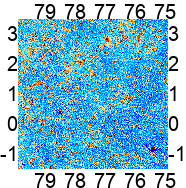

In [9]:
enplot.pshow(SSDS[0]['map'])
#enplot.pshow(nmap)




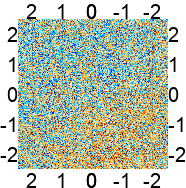

In [37]:
np.max(nmap[2])

array(6232.2188, dtype=float32)